In [4]:
!pip install transformers torch datasets scikit-learn matplotlib seaborn pandas numpy
!pip install accelerate  # This helps with model loading

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 8.6 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 7.8 MB/s eta 0:00:0000:0100:01m
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 8.6 MB/s eta 0:00:0000:0100:01


In [ ]:
# ============================================
# CELL 1: Import Libraries and Setup
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Configure plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Define project paths
PROJECT_ROOT = Path.cwd().parent  # Go up one level from notebooks/
DATA_DIR = PROJECT_ROOT / 'Data'
RESULTS_DIR = PROJECT_ROOT / 'results' / 'figures'

# Create results directory 
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

print("✅ Setup Complete!")
print(f"📁 Project Root: {PROJECT_ROOT}")
print(f"📁 Data Directory: {DATA_DIR}")
print(f"📁 Results Directory: {RESULTS_DIR}")


✅ Setup Complete!
📁 Project Root: /Users/erfanesfahanian/Desktop/audio pattern project/Data
📁 Data Directory: /Users/erfanesfahanian/Desktop/audio pattern project/Data/Data
📁 Results Directory: /Users/erfanesfahanian/Desktop/audio pattern project/Data/results/figures


In [1]:
# ============================================
# CELL 1: Import Libraries and Setup (FIXED)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Configure plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Smart path detection
current_dir = Path.cwd()
print(f"📍 Current directory: {current_dir}")

# Find project root (where Data folder exists)
if current_dir.name == 'notebooks':
    # Running from notebooks/ folder (CORRECT)
    PROJECT_ROOT = current_dir.parent
    print("✅ Running from notebooks/ folder")
elif current_dir.name == 'Data':
    # Running from Data/ folder (WRONG but we'll fix it)
    PROJECT_ROOT = current_dir.parent
    print("⚠️  Running from Data/ folder (notebook should be in notebooks/)")
elif (current_dir / 'Data').exists():
    # Running from project root
    PROJECT_ROOT = current_dir
    print("⚠️  Running from project root (notebook should be in notebooks/)")
else:
    # Can't find Data folder
    print("❌ ERROR: Can't find Data folder!")
    print("Please make sure you're in the right directory")
    PROJECT_ROOT = current_dir

# Define paths
DATA_DIR = PROJECT_ROOT / 'Data'
RESULTS_DIR = PROJECT_ROOT / 'results' / 'figures'

# Verify Data folder exists
if not DATA_DIR.exists():
    print(f"❌ ERROR: Data folder not found at {DATA_DIR}")
else:
    print(f"✅ Data folder found at {DATA_DIR}")

# Check for CSV files
csv_file = DATA_DIR / 'features_30_sec.csv'
if csv_file.exists():
    print(f"✅ CSV file found: {csv_file.name}")
else:
    print(f"❌ ERROR: CSV file not found at {csv_file}")

# Create results directory
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

print("\n" + "="*60)
print("📁 PATHS CONFIGURED")
print("="*60)
print(f"Project Root: {PROJECT_ROOT}")
print(f"Data Directory: {DATA_DIR}")
print(f"Results Directory: {RESULTS_DIR}")

📍 Current directory: /Users/erfanesfahanian/Desktop/audio pattern project/notebooks
✅ Running from notebooks/ folder
✅ Data folder found at /Users/erfanesfahanian/Desktop/audio pattern project/Data
✅ CSV file found: features_30_sec.csv

📁 PATHS CONFIGURED
Project Root: /Users/erfanesfahanian/Desktop/audio pattern project
Data Directory: /Users/erfanesfahanian/Desktop/audio pattern project/Data
Results Directory: /Users/erfanesfahanian/Desktop/audio pattern project/results/figures


In [4]:
# ============================================
# CELL 2: Load Pre-Extracted Feature Data
# ============================================

# Load both CSV files
df_30sec = pd.read_csv(DATA_DIR / 'features_30_sec.csv')
df_3sec = pd.read_csv(DATA_DIR / 'features_3_sec.csv')

print("="*60)
print("📊 DATASET LOADED SUCCESSFULLY")
print("="*60)
print(f"\n30-second features:")
print(f"  Shape: {df_30sec.shape}")
print(f"  → {df_30sec.shape[0]} songs")
print(f"  → {df_30sec.shape[1]} columns (features + metadata)")

print(f"\n3-second features:")
print(f"  Shape: {df_3sec.shape}")
print(f"  → {df_3sec.shape[0]} audio segments")
print(f"  → {df_3sec.shape[1]} columns (features + metadata)")

print(f"\n💡 Note: 3-second dataset has {df_3sec.shape[0] / df_30sec.shape[0]:.0f}x more samples")
print("   (Each 30s song was split into 10 segments of 3s each)")


📊 DATASET LOADED SUCCESSFULLY

30-second features:
  Shape: (1000, 60)
  → 1000 songs
  → 60 columns (features + metadata)

3-second features:
  Shape: (9990, 60)
  → 9990 audio segments
  → 60 columns (features + metadata)

💡 Note: 3-second dataset has 10x more samples
   (Each 30s song was split into 10 segments of 3s each)


In [5]:
# ============================================
# CELL 3: Look at the Data
# ============================================

print("📋 First 5 rows of data:")
print("="*60)
display(df_30sec.head())

print("\n📝 Column Names:")
print("="*60)
print(list(df_30sec.columns))

print("\n🔍 Data Types:")
print("="*60)
print(df_30sec.dtypes.value_counts())

📋 First 5 rows of data:


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues



📝 Column Names:
['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']

🔍 Data Types:
float64    57
object      2
int64       1
Name: cou

In [7]:
# ============================================
# CELL 4: Data Quality Check
# ============================================

print("🔍 DATA QUALITY ASSESSMENT")
print("="*60)

# Check for missing values
missing = df_30sec.isnull().sum().sum()
print(f"Missing values: {missing}")

if missing == 0:
    print("✅ No missing values - dataset is clean!")
else:
    print(f"⚠️ Found {missing} missing values")
    print("\nMissing values per column:")
    print(df_30sec.isnull().sum()[df_30sec.isnull().sum() > 0])

# Check for duplicate rows
duplicates = df_30sec.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

if duplicates == 0:
    print("✅ No duplicate rows")
else:
    print(f"⚠️ Found {duplicates} duplicate rows")


🔍 DATA QUALITY ASSESSMENT
Missing values: 0
✅ No missing values - dataset is clean!

Duplicate rows: 0
✅ No duplicate rows


In [8]:
# ============================================
# CELL 5: Genre Distribution Analysis
# ============================================

print("🎵 GENRE DISTRIBUTION")
print("="*60)

# Count samples per genre
genre_counts = df_30sec['label'].value_counts().sort_index()
print(genre_counts)

print(f"\nTotal genres: {df_30sec['label'].nunique()}")
print(f"Samples per genre: min={genre_counts.min()}, max={genre_counts.max()}")

# Check if balanced
if genre_counts.std() == 0:
    print("✅ Dataset is perfectly balanced!")
else:
    print(f"⚠️ Dataset is imbalanced (std deviation: {genre_counts.std():.2f})")


🎵 GENRE DISTRIBUTION
label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

Total genres: 10
Samples per genre: min=100, max=100
✅ Dataset is perfectly balanced!


✅ Figure saved: /Users/erfanesfahanian/Desktop/audio pattern project/results/figures/01_genre_distribution.png


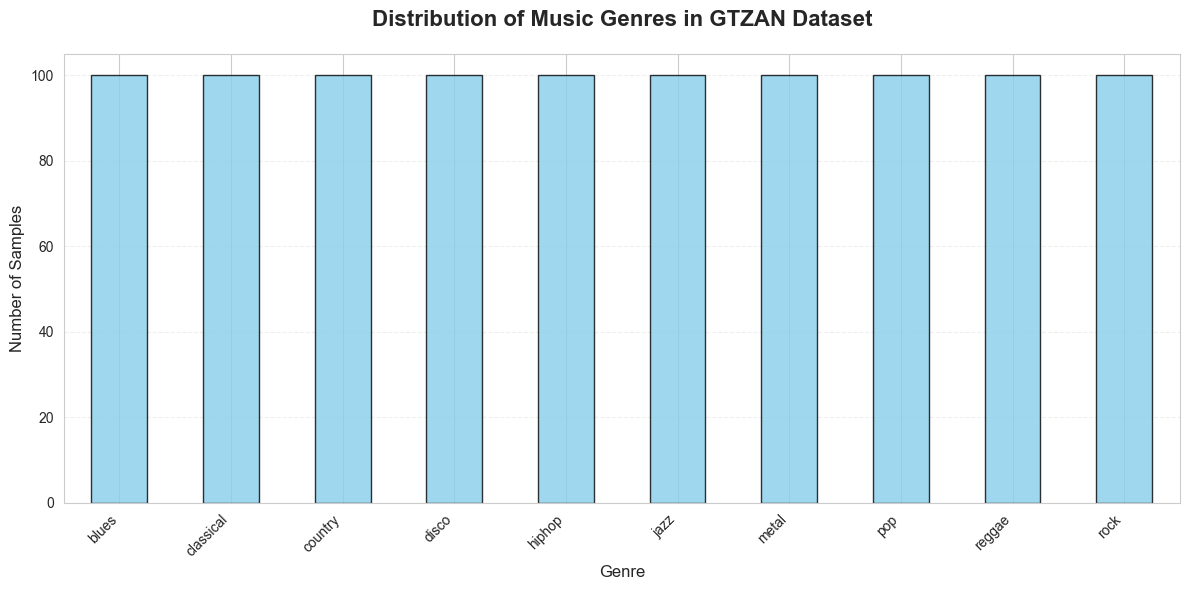

In [9]:
# ============================================
# CELL 6: Visualize Genre Distribution
# ============================================

plt.figure(figsize=(12, 6))

# Create bar plot
genre_counts.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)

# Styling
plt.title('Distribution of Music Genres in GTZAN Dataset', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

# Save figure
save_path = RESULTS_DIR / '01_genre_distribution.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"✅ Figure saved: {save_path}")

plt.show()

In [11]:
# ============================================
# CELL 7: Basic Feature Statistics
# ============================================

print("📊 FEATURE STATISTICS")
print("="*60)

# Select only numeric columns (exclude 'filename' and 'label')
numeric_cols = df_30sec.select_dtypes(include=[np.number]).columns.tolist()

print(f"Number of numeric features: {len(numeric_cols)}")
print(f"\nFeature names:\n{numeric_cols[:10]}...")  # Show first 10

# Get statistical summary
feature_stats = df_30sec[numeric_cols].describe()

print("\n📈 Statistical Summary (first 5 features):")
print(feature_stats.iloc[:, :5])  # Show first 5 features

# Check feature scales
print("\n📏 Feature Value Ranges:")
print(f"  Min value across all features: {df_30sec[numeric_cols].min().min():.2f}")
print(f"  Max value across all features: {df_30sec[numeric_cols].max().max():.2f}")
print("\n💡 Note: Features have different scales - we'll need to normalize later!")


📊 FEATURE STATISTICS
Number of numeric features: 58

Feature names:
['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean']...

📈 Statistical Summary (first 5 features):
              length  chroma_stft_mean  chroma_stft_var     rms_mean  \
count    1000.000000       1000.000000      1000.000000  1000.000000   
mean   662030.846000          0.378682         0.086340     0.130930   
std      1784.073992          0.081705         0.007735     0.065683   
min    660000.000000          0.171939         0.044555     0.005276   
25%    661504.000000          0.319562         0.082298     0.086657   
50%    661794.000000          0.383148         0.086615     0.122443   
75%    661794.000000          0.435942         0.091256     0.175682   
max    675808.000000          0.663685         0.108111     0.397973   

           rms_var  
count  1000.000000  
me

In [12]:
# ============================================
# CELL 8: Summary
# ============================================

print("\n" + "="*60)
print("✅ DATA EXPLORATION COMPLETE")
print("="*60)

print("\n📊 Key Findings:")
print(f"  ✓ Total samples: {len(df_30sec):,} (30s) / {len(df_3sec):,} (3s)")
print(f"  ✓ Number of genres: {df_30sec['label'].nunique()}")
print(f"  ✓ Number of features: {len(numeric_cols)}")
print(f"  ✓ Missing values: {df_30sec.isnull().sum().sum()}")
print(f"  ✓ Dataset balance: {'Balanced ✓' if genre_counts.std() == 0 else 'Imbalanced ✗'}")
print(f"  ✓ Feature scales: Different (will need normalization)")

print("\n📁 Saved Outputs:")
print(f"  → {RESULTS_DIR / '01_genre_distribution.png'}")

print("\n🎯 Next Steps:")
print("  1. Create 02_audio_visualization.ipynb")
print("  2. Visualize audio waveforms and spectrograms")
print("  3. Listen to sample audio files")
print("  4. Understand what makes genres different")

print("\n💡 What we learned:")
print("  - GTZAN has 1000 songs, 100 per genre")
print("  - 57 audio features are pre-extracted")
print("  - Dataset is clean and balanced")
print("  - Ready for machine learning!")


✅ DATA EXPLORATION COMPLETE

📊 Key Findings:
  ✓ Total samples: 1,000 (30s) / 9,990 (3s)
  ✓ Number of genres: 10
  ✓ Number of features: 58
  ✓ Missing values: 0
  ✓ Dataset balance: Balanced ✓
  ✓ Feature scales: Different (will need normalization)

📁 Saved Outputs:
  → /Users/erfanesfahanian/Desktop/audio pattern project/results/figures/01_genre_distribution.png

🎯 Next Steps:
  1. Create 02_audio_visualization.ipynb
  2. Visualize audio waveforms and spectrograms
  3. Listen to sample audio files
  4. Understand what makes genres different

💡 What we learned:
  - GTZAN has 1000 songs, 100 per genre
  - 57 audio features are pre-extracted
  - Dataset is clean and balanced
  - Ready for machine learning!
